# Tema 13: Ajuste de hiperparámetros

En este notebook presentamos un ejemplo de cómo realizar el ajuste de hiperparámetros en la tarea de detección de cáncer con el dataset de Breast Cancer: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

La optimización o ajuste de hiperparámetros es el problema de elegir un conjunto de hiperparámetros óptimos para un algoritmo de aprendizaje.

Simplificando el problema, el ajuste de hiperparámetros lo podemos simplificar en base al algortimo elegido.

Puede ser tan simple como lo siguiente:

- ¿Cuántos árboles debo incluir en mi Random Forest?
- ¿Qué grado de polinomio debo usar para mi modelo lineal?
- ¿Cuál debería ser la profundidad máxima permitida para un árbol de decisión?
- ¿Cuántas capas debo tener en mi red neuronal?
- ¿A qué debo establecer mi tasa de aprendizaje para el descenso de gradiente?

Realizaremos el ejemplo con GridSearch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)

In [5]:
data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [4]:
data.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 0 malignant, 1 benign
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
df_features = pd.DataFrame(data.data, columns = data.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df_target = pd.DataFrame(data.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [10]:
df_features.shape

(569, 30)

In [11]:
df_target.shape

(569, 1)

In [12]:
df_target.value_counts()

target
1         357
0         212
dtype: int64

In [ ]:
df_features.dtypes

In [13]:
df_features.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64

In [14]:
df_features.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [15]:
df_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
corr = df_features.corr()
corr.shape

(30, 30)

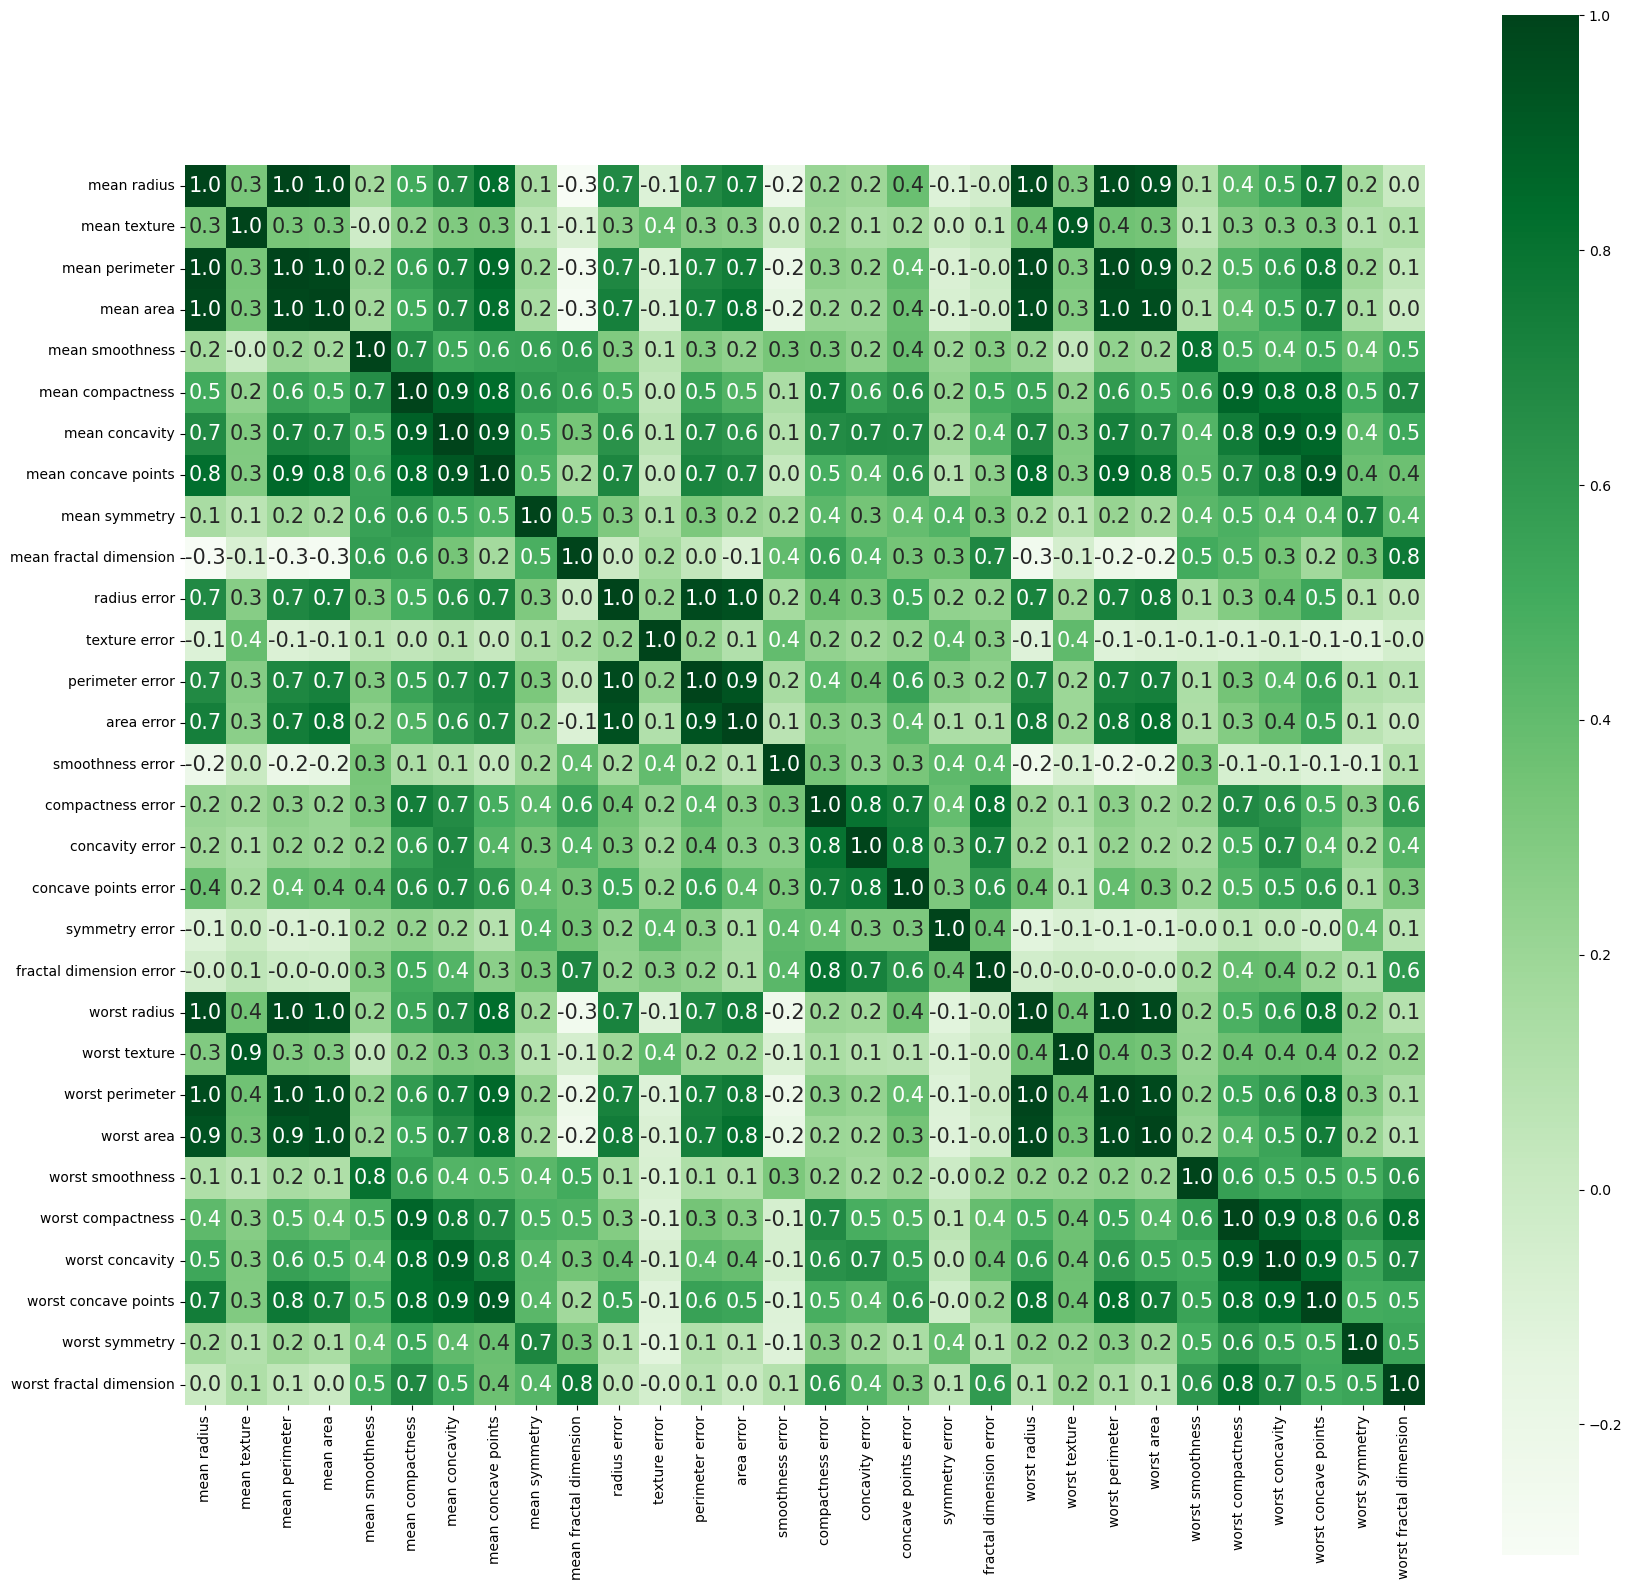

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [20]:
df = pd.concat([df_features, df_target], axis=1)

In [21]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [22]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Count Plot of Diagnosis')

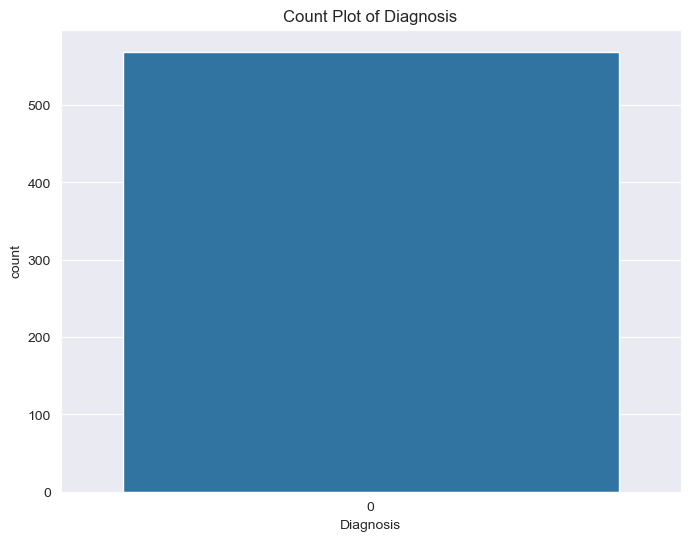

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

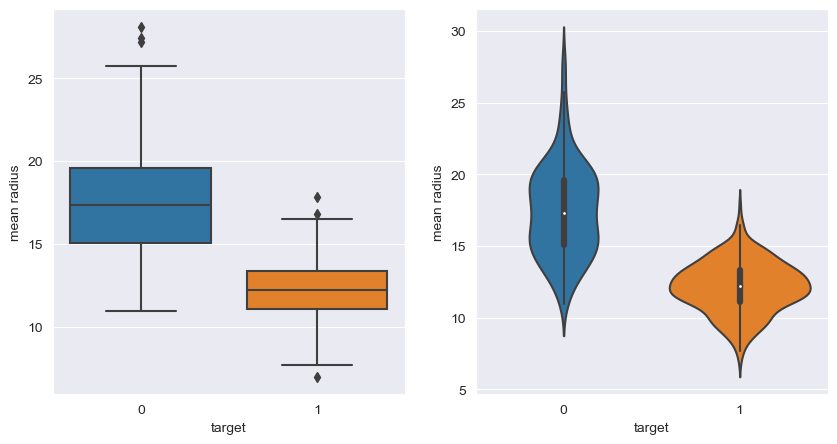

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="target", y="mean radius", data=df)
plt.subplot(1,2,2)
sns.violinplot(x="target", y="mean radius", data=df)
plt.show()

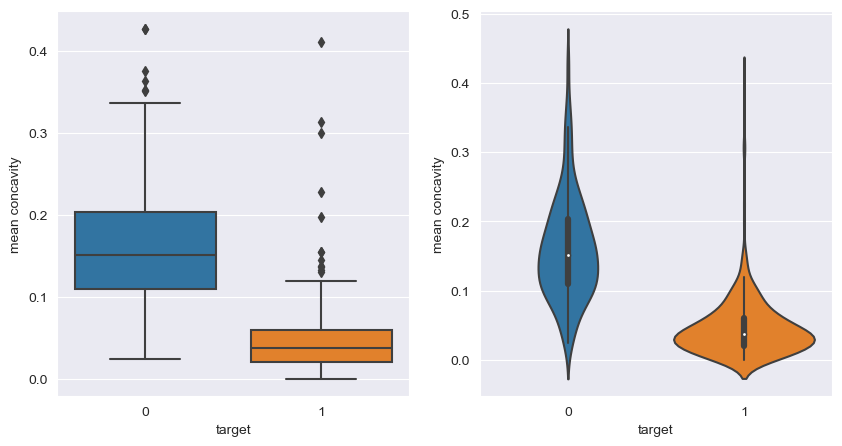

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="target", y="mean concavity", data=df)
plt.subplot(1,2,2)
sns.violinplot(x="target", y="mean concavity", data=df)
plt.show()

In [ ]:
df.columns

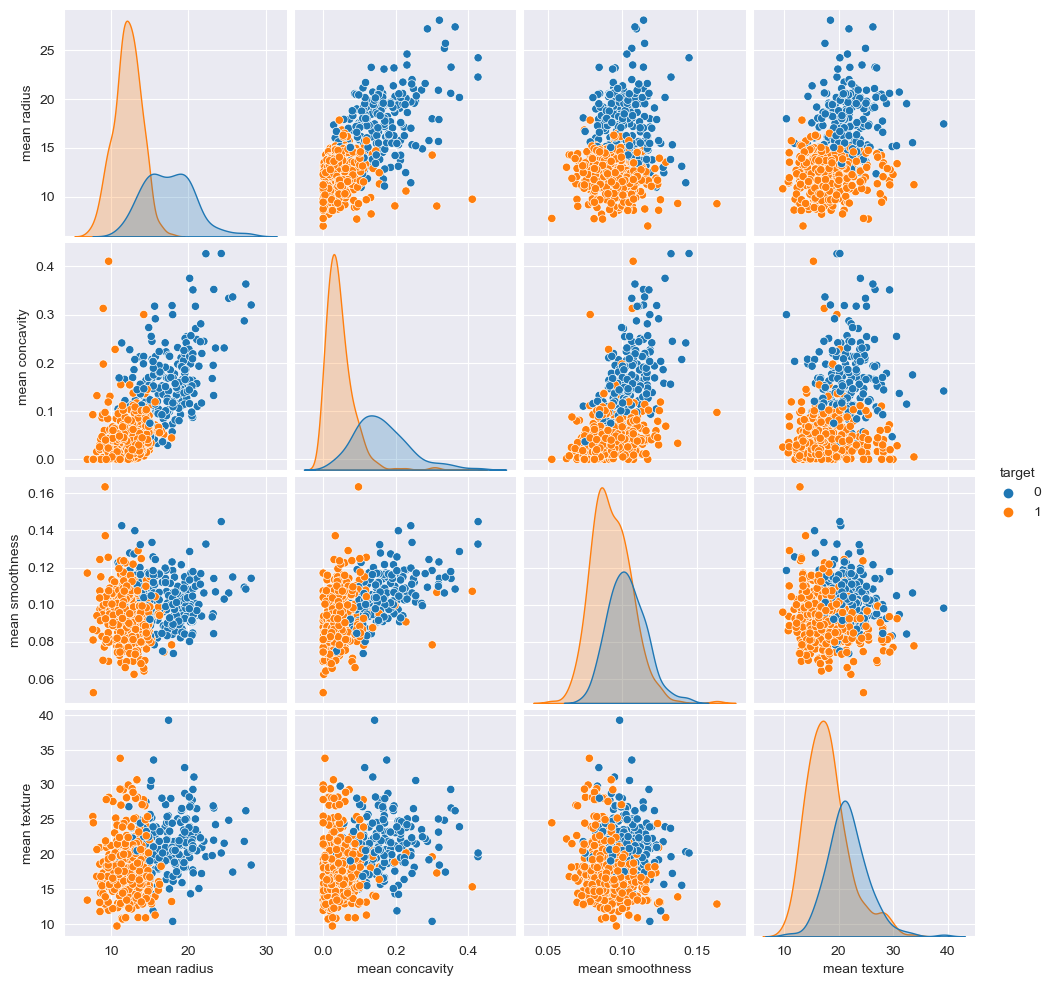

In [26]:
sns.pairplot(df, hue="target", vars = ["mean radius", "mean concavity", "mean smoothness", "mean texture"])
plt.show()

In [27]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (398, 30)
Size of test set: (171, 30)


In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\amasdfamily\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  95.91


In [31]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [32]:
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  92.4


In [33]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [34]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=5)

In [35]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [36]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  91.81


In [38]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6],#, 9, 10, 15], 
              'max_features': ['log2'],#, 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=3, n_estimators=6)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  93.57


In [41]:
# SVM Classifier

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn import svm

svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters, verbose=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ..............C=100, kernel=linear;

SVC(C=100, gamma=0.001)

In [43]:
y_pred = svc.predict(X_test)

In [44]:
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  98.25


In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,98.25
0,Logistic Regression,95.91
3,Random Forest,93.57
1,Naive Bayes,92.40
2,Decision Tree,91.81
